<a href="https://colab.research.google.com/github/Monisha2604/Final_Year_Project/blob/master/Classification_sklearn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sb

In [ ]:
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_predict,cross_val_score
from sklearn.metrics import precision_score,recall_score,f1_score,confusion_matrix

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [ ]:
from sklearn.ensemble import AdaBoostClassifier,RandomForestClassifier
from tensorflow import keras
from keras.layers import Dense,Dropout,Input
from keras.models import Model
from keras.utils import to_categorical,plot_model



ImportError: ignored

In [ ]:
data=pd.read_csv("/content/drive/MyDrive/MyTable_Sourav_0 (1).csv")

In [ ]:
data.head()

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
0,1237648675604791614,241.342917,1.174301,19.51355,19.20316,19.45578,19.71678,19.94081,745,301,6,552,387465727008860160,STAR,-0.000276,344,51693,568
1,1237648675604791855,241.453357,1.103976,19.27841,18.15512,17.91325,17.84251,17.83266,745,301,6,552,387464077741418496,STAR,-0.000640,344,51693,562
2,1237648675604987914,241.766475,1.108192,18.36716,16.15226,15.06507,14.51372,14.05285,745,301,6,555,388525106411890688,GALAXY,0.027258,345,51690,326
3,1237648675604988405,241.852655,1.138415,19.53237,17.64661,16.59679,16.07399,15.67989,745,301,6,555,388527855190960128,GALAXY,0.056678,345,51690,336
4,1237648675605053923,242.032775,1.085364,17.92471,16.89563,16.34107,16.06352,15.82847,745,301,6,556,388535826650261504,GALAXY,0.024477,345,51690,365


In [ ]:
enc = LabelEncoder()
data['class'] = enc.fit_transform(data['class']) # Galaxy: 0 ,QSO : 1, Star : 2
data.drop(['objid','rerun'],1,inplace=True) #dropping objid because it is basicaly id and rerun has the same value of 301 across the entire dataset


In [ ]:
data

,ra,dec,u,g,r,i,z,run,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
0,241.342917,1.174301,19.51355,19.20316,19.45578,19.71678,19.94081,745,6,552,387465727008860160,2,-0.000276,344,51693,568
1,241.453357,1.103976,19.27841,18.15512,17.91325,17.84251,17.83266,745,6,552,387464077741418496,2,-0.000640,344,51693,562
2,241.766475,1.108192,18.36716,16.15226,15.06507,14.51372,14.05285,745,6,555,388525106411890688,0,0.027258,345,51690,326
3,241.852655,1.138415,19.53237,17.64661,16.59679,16.07399,15.67989,745,6,555,388527855190960128,0,0.056678,345,51690,336
4,242.032775,1.085364,17.92471,16.89563,16.34107,16.06352,15.82847,745,6,556,388535826650261504,0,0.024477,345,51690,365
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
712276,341.206598,25.421164,19.09945,17.11115,16.14581,15.68184,15.35745,8110,3,117,7091189296820887552,0,0.082436,6298,56208,988
712277,341.592597,25.467884,18.50628,17.61458,17.27222,17.15221,17.13450,8110,3,119,8621189981912670208,2,-0.000464,7657,57309,634
712278,341.753313,25.439133,19.47210,18.51253,18.17173,18.05165,17.97351,8110,3,120,7082108705668308992,2,-0.000784,6290,56238,721
712279,342.761684,25.533355,19.31310,19.00313,18.82146,18.91799,18.79010,8110,3,126,8619945335236567040,1,0.855534,7656,57338,202


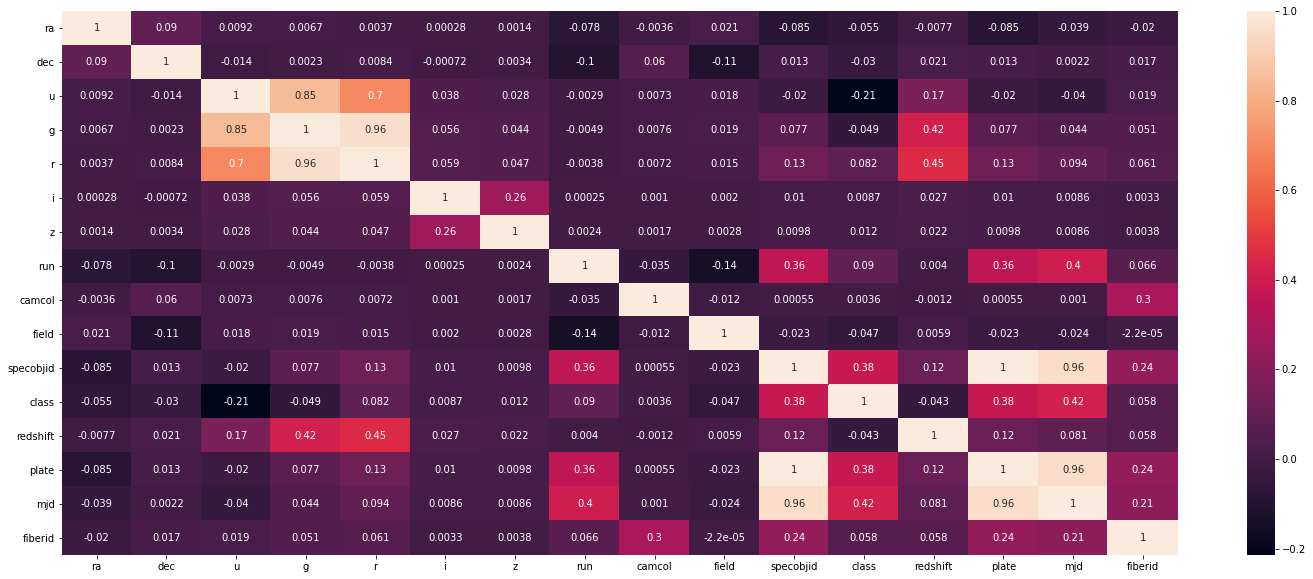

In [ ]:
plt.figure(figsize = (25,10))
sb.heatmap(data.corr(),annot = True)


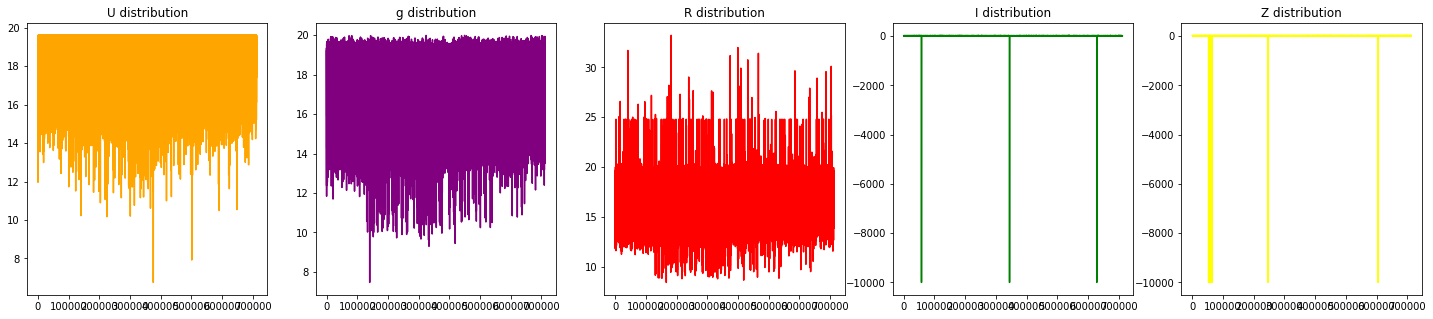

In [ ]:
fig,ax = plt.subplots(1,5,figsize = (25,5))
ax[0].plot(data['u'],color = 'orange');
ax[0].set_title('U distribution');
ax[1].plot(data['g'],color = 'purple');
ax[1].set_title('g distribution');
ax[2].plot(data['r'],color = 'red');
ax[2].set_title('R distribution');
ax[3].plot(data['i'],color = 'green');
ax[3].set_title('I distribution');
ax[4].plot(data['z'],color = 'yellow');
ax[4].set_title('Z distribution');

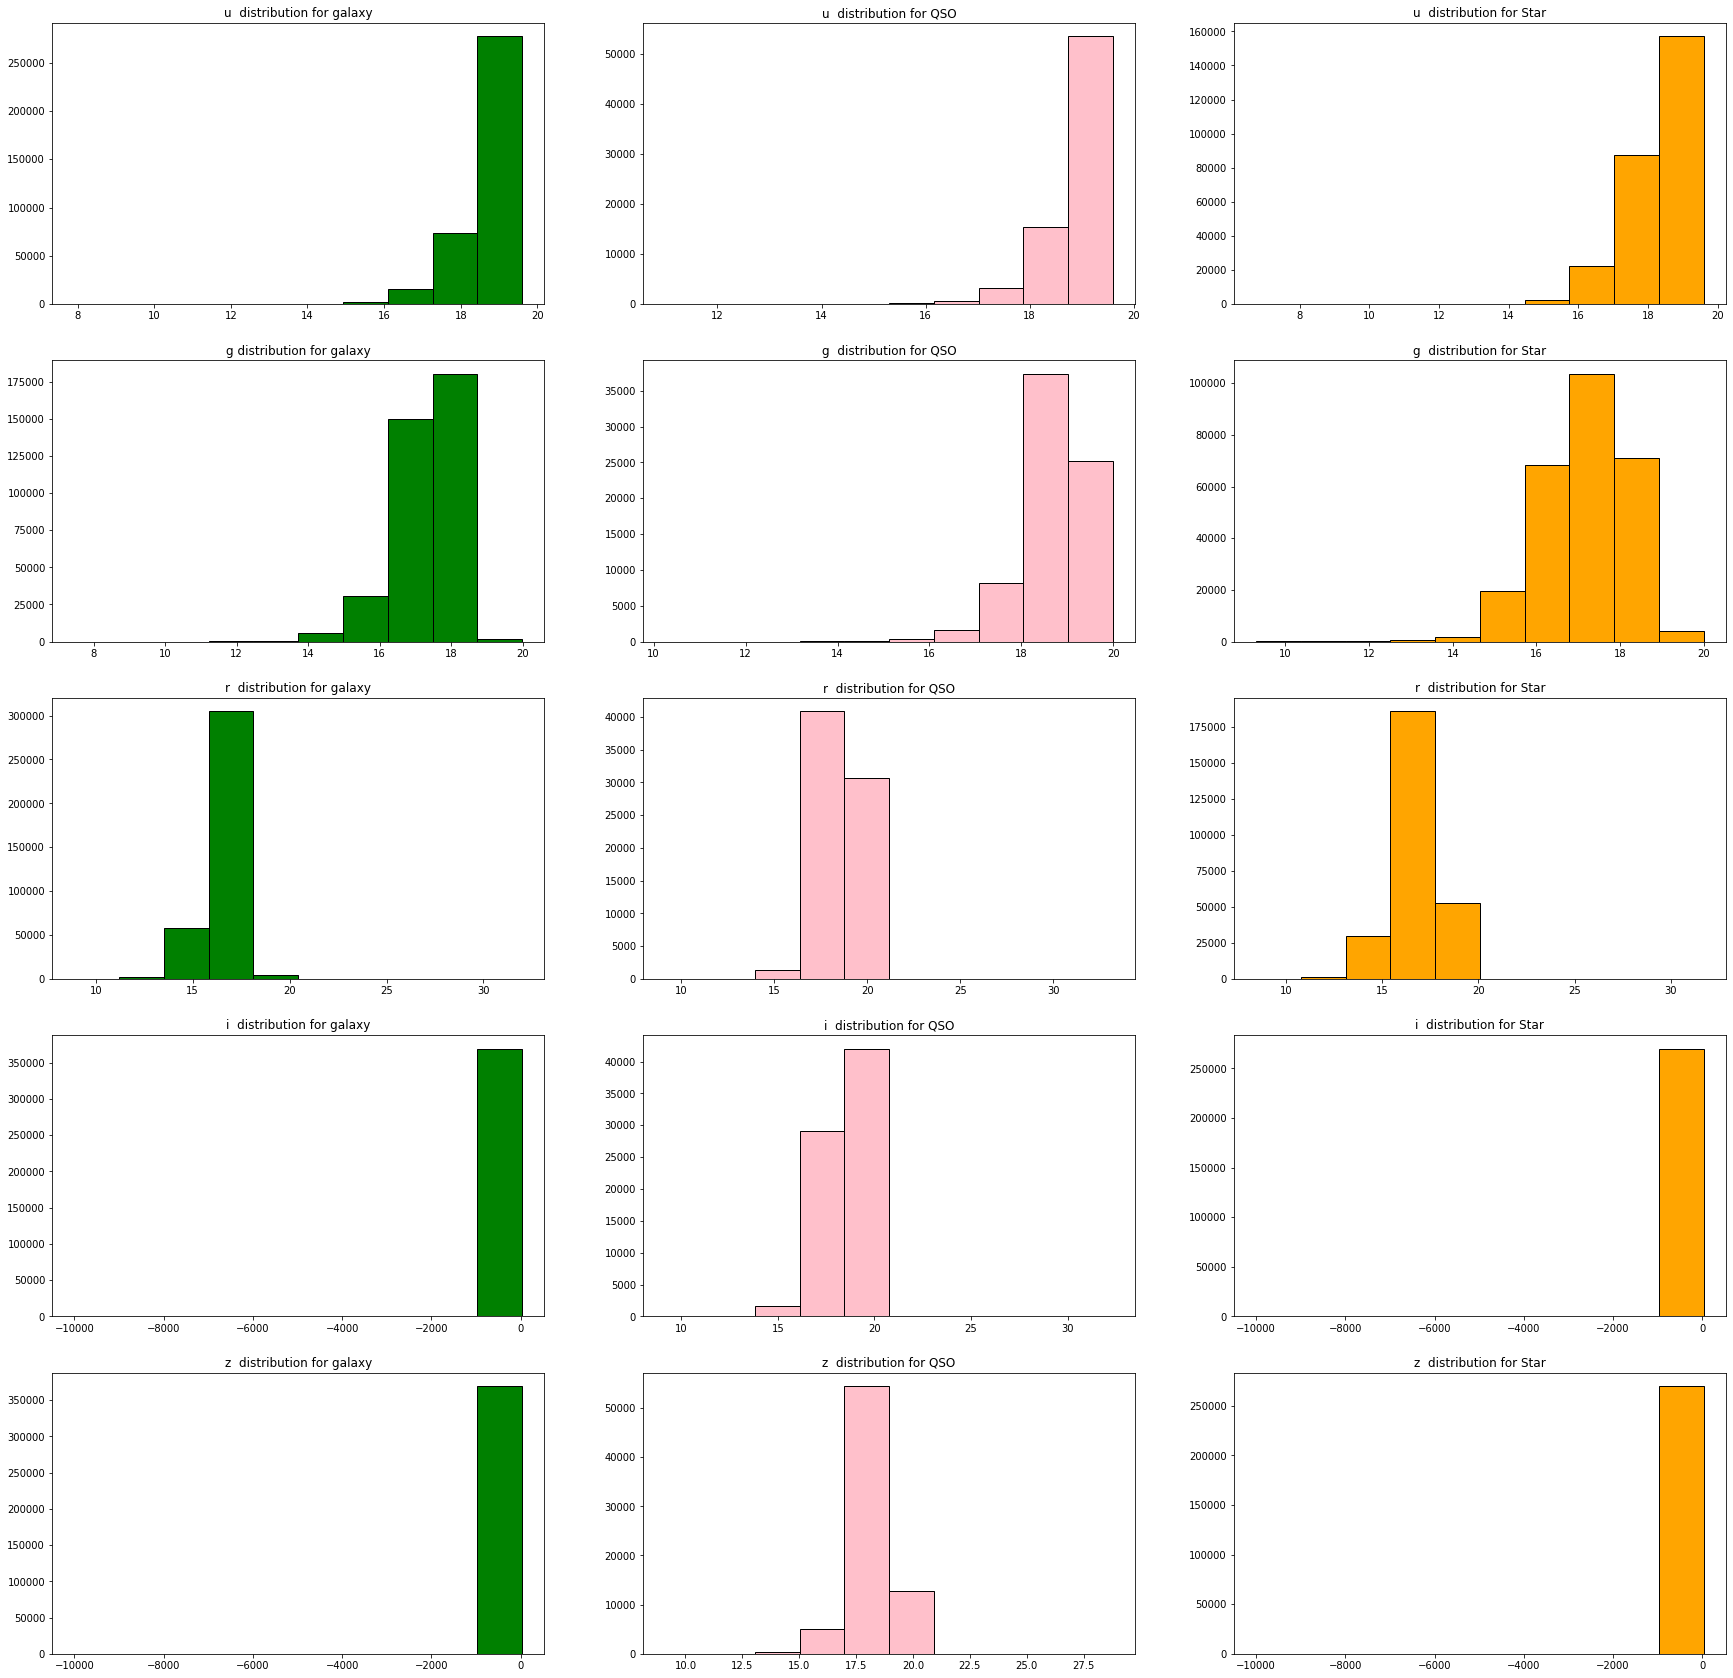

In [ ]:
fig,ax = plt.subplots(5,3,figsize = (30,30))
ax[0][0].hist([data[data['class']==0]['u']],color = 'green',edgecolor = 'black');
ax[0][0].set_title('u  distribution for galaxy');
ax[0][1].hist([data[data['class']==1]['u']],color = 'pink',edgecolor = 'black');
ax[0][1].set_title('u  distribution for QSO');
ax[0][2].hist([data[data['class']==2]['u']],color = 'orange',edgecolor = 'black');
ax[0][2].set_title('u  distribution for Star');
ax[1][0].hist([data[data['class']==0]['g']],color = 'green',edgecolor = 'black');
ax[1][0].set_title('g distribution for galaxy');
ax[1][1].hist([data[data['class']==1]['g']],color = 'pink',edgecolor = 'black');
ax[1][1].set_title('g  distribution for QSO');
ax[1][2].hist([data[data['class']==2]['g']],color = 'orange',edgecolor = 'black');
ax[1][2].set_title('g  distribution for Star');
ax[2][0].hist([data[data['class']==0]['r']],color = 'green',edgecolor = 'black');
ax[2][0].set_title('r  distribution for galaxy');
ax[2][1].hist([data[data['class']==1]['r']],color = 'pink',edgecolor = 'black');
ax[2][1].set_title('r  distribution for QSO');
ax[2][2].hist([data[data['class']==2]['r']],color = 'orange',edgecolor = 'black');
ax[2][2].set_title('r  distribution for Star');
ax[3][0].hist([data[data['class']==0]['i']],color = 'green',edgecolor = 'black');
ax[3][0].set_title('i  distribution for galaxy');
ax[3][1].hist([data[data['class']==1]['i']],color = 'pink',edgecolor = 'black');
ax[3][1].set_title('i  distribution for QSO');
ax[3][2].hist([data[data['class']==2]['i']],color = 'orange',edgecolor = 'black');
ax[3][2].set_title('i  distribution for Star');
ax[4][0].hist([data[data['class']==0]['z']],color = 'green',edgecolor = 'black');
ax[4][0].set_title('z  distribution for galaxy');
ax[4][1].hist([data[data['class']==1]['z']],color = 'pink',edgecolor = 'black');
ax[4][1].set_title('z  distribution for QSO');
ax[4][2].hist([data[data['class']==2]['z']],color = 'orange',edgecolor = 'black');
ax[4][2].set_title('z  distribution for Star');

In [ ]:
data.to_csv("classification.csv")


In [ ]:
data

,ra,dec,u,g,r,i,z,run,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
0,241.342917,1.174301,19.51355,19.20316,19.45578,19.71678,19.94081,745,6,552,387465727008860160,2,-0.000276,344,51693,568
1,241.453357,1.103976,19.27841,18.15512,17.91325,17.84251,17.83266,745,6,552,387464077741418496,2,-0.000640,344,51693,562
2,241.766475,1.108192,18.36716,16.15226,15.06507,14.51372,14.05285,745,6,555,388525106411890688,0,0.027258,345,51690,326
3,241.852655,1.138415,19.53237,17.64661,16.59679,16.07399,15.67989,745,6,555,388527855190960128,0,0.056678,345,51690,336
4,242.032775,1.085364,17.92471,16.89563,16.34107,16.06352,15.82847,745,6,556,388535826650261504,0,0.024477,345,51690,365
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
712276,341.206598,25.421164,19.09945,17.11115,16.14581,15.68184,15.35745,8110,3,117,7091189296820887552,0,0.082436,6298,56208,988
712277,341.592597,25.467884,18.50628,17.61458,17.27222,17.15221,17.13450,8110,3,119,8621189981912670208,2,-0.000464,7657,57309,634
712278,341.753313,25.439133,19.47210,18.51253,18.17173,18.05165,17.97351,8110,3,120,7082108705668308992,2,-0.000784,6290,56238,721
712279,342.761684,25.533355,19.31310,19.00313,18.82146,18.91799,18.79010,8110,3,126,8619945335236567040,1,0.855534,7656,57338,202


In [ ]:
y = data['class']
data.drop('class',1,inplace=True)
x = data


In [ ]:
data.shape

(712281, 15)

In [ ]:
data.dtypes

ra           float64
dec          float64
u            float64
g            float64
r            float64
i            float64
z            float64
run            int64
camcol         int64
field          int64
specobjid     uint64
redshift     float64
plate          int64
mjd            int64
fiberid        int64
dtype: object

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = (0.25),random_state=42)

KNeighborsClassifier


In [ ]:
model_params = {'n_neighbors':np.arange(1,10)}
grid = GridSearchCV(KNeighborsClassifier(),model_params)
grid.fit(x,y)

GridSearchCV(cv=None, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': array([1, 2, 3, 4, 5, 6, 7, 8, 9])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [ ]:
grid.best_params_

{'n_neighbors': 9}

In [ ]:
KNNmodel = KNeighborsClassifier(n_neighbors = 9)
KNNmodel.fit(x_train,y_train) 


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=9, p=2,
                     weights='uniform')

In [ ]:
y_pred=KNNmodel.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score 
print(accuracy_score(y_test, y_pred))

0.7913079614311146


In [ ]:
print (y_pred,y_test)

[0 2 0 ... 1 0 0] 174634    0
304536    2
270035    2
227978    2
676888    0
         ..
498550    0
80694     2
705237    2
126934    1
201304    2
Name: class, Length: 178071, dtype: int64


In [ ]:
y_train_pred = cross_val_predict(KNNmodel,x_train,y_train,cv=3)
print("Confusion Matrix:")
print(confusion_matrix(y_train,y_train_pred))
print("")
precision_knn = precision_score(y_train_pred,y_train,average = None)
print("Precison_Score:",precision_knn.mean())
recall_knn = recall_score(y_train_pred,y_train,average = None)
print("Recall_score:",recall_knn.mean())

print("Cross Val Score in Sample",cross_val_score(KNNmodel,x_train,y_train,cv=3,scoring='accuracy').mean())
print("Cross Val Score out Sample",cross_val_score(KNNmodel,x_test,y_test,cv=3,scoring='accuracy').mean())

Confusion Matrix:
[[262930   2443  11330]
 [ 39476   4467  10905]
 [ 42751   5343 154565]]

Precison_Score: 0.5981176573362756
Recall_score: 0.6668564958143869
Cross Val Score in Sample 0.789880384118605
Cross Val Score out Sample 0.7900275732713357


In [ ]:
import time 

start=time.process_time()
KNNmodel.fit(x_train, y_train) 
stop=time.process_time()
execution_time = (stop - start)/60
print("Program Executed in minutes "+str(execution_time))

Program Executed in minutes 0.09290241788333257


Random forest 


In [ ]:
from sklearn.ensemble import AdaBoostClassifier,RandomForestClassifier

import time
Forest  = RandomForestClassifier(max_depth = 3,n_estimators = 5)
start=time.process_time()
Forest.fit(x_train,y_train) 
stop=time.process_time()
execution_time = (stop - start)/60
print("Program Executed in minutes "+str(execution_time))

Program Executed in minutes 0.00022838424999997996


In [ ]:
y_pred=Forest.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score 
print(accuracy_score(y_test, y_pred))

0.96


In [ ]:
y_train_pred = cross_val_predict(Forest,x_train,y_train,cv=3)
print("Confusion Matrix:")
print(confusion_matrix(y_train,y_train_pred))
print("")
precision_forest = precision_score(y_train_pred,y_train,average = None)
print("Precison_Score:",precision_forest.mean())
recall_forest = recall_score(y_train_pred,y_train,average = None)
print("Recall_score:",recall_forest.mean())

print("Cross Val Score in Sample",cross_val_score(Forest,x_train,y_train,cv=3,scoring='accuracy').mean())
print("Cross Val Score out Sample",cross_val_score(Forest,x_test,y_test,cv=3,scoring='accuracy').mean())

Confusion Matrix:
[[31  5]
 [ 9 30]]

Precison_Score: 0.8151709401709402
Recall_score: 0.8160714285714286
Cross Val Score in Sample 0.7599999999999999
Cross Val Score out Sample 0.8842592592592592


ANN

In [ ]:
from numpy import loadtxt
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
x_train

,ra,dec,u,g,r,i,z,run,camcol,field,specobjid,redshift,plate,mjd,fiberid
548465,185.696558,19.692680,19.39316,17.40664,16.43722,16.00200,15.62257,5314,3,60,2938605429023860736,0.075667,2610,54476,24
90092,128.116796,45.945945,19.41405,18.37315,17.72025,17.35443,17.14313,2075,3,69,618177905964378112,0.182182,549,51981,214
344592,199.043545,41.234995,18.71476,17.45604,16.94832,16.64396,16.44150,3840,3,245,1646148729142536192,0.047626,1462,53112,302
654557,31.331581,6.166932,18.52378,17.12642,16.47838,16.21791,16.11254,5714,2,82,3508343772536741888,-0.000215,3116,54792,144
88482,237.242205,48.962918,18.84943,17.13677,16.48606,16.08813,15.81049,2299,2,265,914349236194142208,0.084708,812,52352,431
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259178,223.355893,39.624273,19.15889,18.92506,18.70637,18.71785,18.52138,3699,2,212,1572895691204749312,0.946679,1397,53119,49
365838,243.329888,33.844538,18.34347,16.85154,16.16015,15.73114,15.48058,3964,3,206,1894949249368483840,0.092334,1683,53436,217
131932,150.495041,45.104462,19.56636,19.43699,19.41879,19.21478,19.22849,2887,5,274,8201089118425292800,1.686349,7284,56683,124
671155,179.812287,6.650602,19.10209,17.98864,17.52644,17.33688,17.23799,5976,4,237,3655955684077445120,0.000084,3247,54888,577


In [ ]:
y_train

548465    0
90092     0
344592    0
654557    2
88482     0
         ..
259178    1
365838    0
131932    1
671155    2
121958    0
Name: class, Length: 534210, dtype: int64

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

In [ ]:
from sklearn.preprocessing import MinMaxScaler 
scaler = MinMaxScaler() 
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)


In [ ]:
from numpy import loadtxt
from keras.models import Sequential
from keras.layers import Dense
classifier = Sequential()
# Adding the input layer and the first hidden layer
classifier.add(Dense(units = 256, kernel_initializer = 'uniform', activation = 'relu', input_dim = 15))

# Adding the second hidden layer
classifier.add(Dense(units = 256, kernel_initializer = 'uniform', activation = 'relu'))
classifier.add(Dense(units = 256, kernel_initializer = 'uniform', activation = 'relu'))
classifier.add(Dense(units = 256, kernel_initializer = 'uniform', activation = 'relu'))
classifier.add(Dense(units = 256, kernel_initializer = 'uniform', activation = 'relu'))


# Adding the output layer
classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

# Compiling the ANN | means applying SGD on the whole ANN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])




DECISION TREE


In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1) # 70% training and 30% test

In [ ]:
clf = DecisionTreeClassifier()
import time 

start=time.process_time()
clf = clf.fit(x_train,y_train) 
stop=time.process_time()
execution_time = (stop - start)/60
print("Program Executed in minutes "+str(execution_time)) 


Program Executed in minutes 0.37562533254999836


In [ ]:
y_pred = clf.predict(x_test) 
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9884924070477572


In [ ]:
y_train_pred = cross_val_predict(clf,x_train,y_train,cv=3)
print("Confusion Matrix:")
print(confusion_matrix(y_train,y_train_pred))
print("")
precision_dec = precision_score(y_train_pred,y_train,average = None)
print("Precison_Score:",precision_dec.mean())
recall_dec = recall_score(y_train_pred,y_train,average = None)
print("Recall_score:",recall_dec.mean())

print("Cross Val Score in Sample",cross_val_score(clf,x_train,y_train,cv=3,scoring='accuracy').mean())
print("Cross Val Score out Sample",cross_val_score(clf,x_test,y_test,cv=3,scoring='accuracy').mean())

Confusion Matrix:
[[255685   2609    431]
 [  2385  48583      9]
 [   427     14 188453]]

Precison_Score: 0.9796510247296605
Recall_score: 0.9785226345566486
Cross Val Score in Sample 0.9881948509488284
Cross Val Score out Sample 0.9874113770402086


Logistic Regression


In [ ]:
import pandas as pd 
from sklearn.model_selection import train_test_split 
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=0)

In [ ]:
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression()

import time 
start=time.process_time() 
logreg.fit(x_train,y_train) 
stop=time.process_time()
execution_time = (stop - start)/60
print("Program Executed in minutes "+str(execution_time)) 





Program Executed in minutes 0.0001344450833333344


In [ ]:
y_pred=logreg.predict(x_test)

In [ ]:
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_predict,cross_val_score
from sklearn.metrics import precision_score,recall_score,f1_score,confusion_matrix
y_train_pred = cross_val_predict(logreg,x_train,y_train,cv=3)
print("Confusion Matrix:")
print(confusion_matrix(y_train,y_train_pred))
print("")
precision_log = precision_score(y_train_pred,y_train,average = None)
print("Precison_Score:",precision_log.mean())
recall_log = recall_score(y_train_pred,y_train,average = None)
print("Recall_score:",recall_log.mean())

print("Cross Val Score in Sample",cross_val_score(logreg,x_train,y_train,cv=3,scoring='accuracy').mean())
print("Cross Val Score out Sample",cross_val_score(logreg,x_test,y_test,cv=3,scoring='accuracy').mean())

Confusion Matrix:
[[35  1]
 [ 4 35]]

Precison_Score: 0.9348290598290598
Recall_score: 0.9348290598290598
Cross Val Score in Sample 0.9333333333333332
Cross Val Score out Sample 0.9259259259259259


In [ ]:
from sklearn.metrics import accuracy_score 
print(accuracy_score(y_test, y_pred))

0.96
